### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data prçocessing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Personalmente creo que no existe una correlacion directa 

In [3]:
lista_alumnos = [[29,  1.66], [22, 1.83], [31, 1.80], [27, 1.75], [22,1.82], [35,1.79], [34,1.90], [26,1.78], [26, 1.64], [23, 1.74],[24,1.85], [28, 1.75], [23, 1.83],[32,1.74], [34, 1.57], [27, 1.58],[38,1.70],[22, 1.79]]

In [4]:
clase = pd.DataFrame(lista_alumnos)
clase.columns = ['Edad', 'Altura']

In [5]:
clase.head()

,Edad,Altura
0,29,1.66
1,22,1.83
2,31,1.80
3,27,1.75
4,22,1.82


In [6]:
clase.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Edad    18 non-null     int64  
 1   Altura  18 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [7]:
clase.describe()

,Edad,Altura
count,18.000000,18.000000
mean,27.944444,1.751111
std,5.034846,0.091065
min,22.000000,1.570000
25%,23.250000,1.710000
50%,27.000000,1.765000
75%,31.750000,1.815000
max,38.000000,1.900000


In [8]:
clase.corr()

,Edad,Altura
Edad,1.000000,-0.248752
Altura,-0.248752,1.000000


<AxesSubplot:>

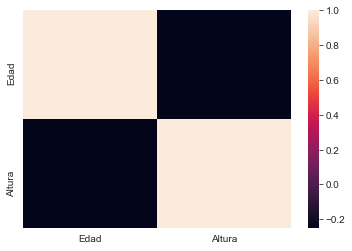

In [9]:
sns.heatmap(clase.corr())

## Train Model

In [27]:
X_ = clase['Edad'].astype(int)
y_ = clase['Altura']*100
y_ = y_.astype(int)
X = np.array(X_).reshape(-1, 1)
y = np.array(y_).reshape(-1, 1)
y

array([[166],
       [183],
       [180],
       [175],
       [182],
       [179],
       [190],
       [178],
       [164],
       [174],
       [185],
       [175],
       [183],
       [174],
       [157],
       [158],
       [170],
       [179]])

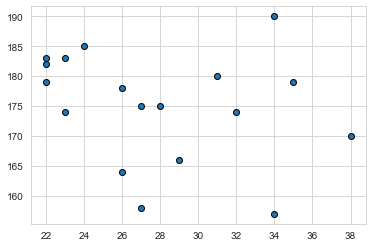

In [26]:
plt.scatter(X,y, edgecolor='black')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:

def plot_learning_curves(model, X, Y):
    # 80% de Train
    # 20% de Test
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    
    for m in range(1, len(X_train)//7):  # Incremental
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(model= lin_reg, X=X, Y=y)

In [36]:
def predict(model, number):
    to_predict = np.array([number]).reshape(1, -1)
    return model.predict(to_predict)
y_pred = lin_reg.predict(y)

In [29]:
b = lin_reg.coef_ 
b

array([[0.]])

In [30]:
a = lin_reg.intercept_
a

array([183.])

In [32]:
lin_reg.score(X, y)*100

-79.4609079445145

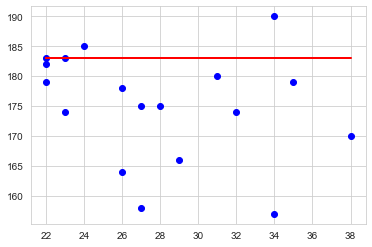

In [33]:
plt.scatter(X, y, color='b')
plt.plot(X, lin_reg.predict(X), color='red')

plt.show()

## MSE y RMSE


In [37]:
mean_squared_error(y,y_pred) 

140.55555555555554

In [38]:
mean_squared_error(y,y_pred, squared=False) 

11.855612829185826

## Times 2

In [40]:
X_2 = X_ *2
X = np.array(X_2).reshape(-1, 1)

In [41]:
plot_learning_curves(model= lin_reg, X=X, Y=y)

In [42]:
y_2 = y_ *2
y = np.array(y_2).reshape(-1, 1)
plot_learning_curves(model= lin_reg, X=X, Y=y)